In [6]:
# Reference: https://github.com/jrcasso/swinging-atwood-rk4
from numpy import *
import matplotlib . pyplot as plt
import math
seterr(all='raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [7]:
def runge_kutta_4_algorithm():
    global flag
    flag = False
    variables[0] = array([r0, rdot0, -theta0, -theta_dot0])
    for i in range(indices - 1):
        try:
            if ((theta0 == 0 and theta_dot0 == 0) or theta0 == math.pi) and i == 0:
                print('Warning : Unstable or stable equilibrium chosen as initial value. Results may be unintended.')
            if variables[i][0] <= (threshold * r0):
                print('The trajectory came within the threshold for identifying a singularity (%.4f%% of r0). The program has finished early (%.2 f s ) to avoid infinities.' % ((threshold * r0 * 100), (i * step)))
                break
            k1 = step * sam_accelerator(variables[i], times[i])
            k2 = step * sam_accelerator(variables[i] + k1 / 2, times[i] + step)
            k3 = step * sam_accelerator(variables[i] + k2 / 2, times[i] + step)
            k4 = step * sam_accelerator(variables[i] + k3, times[i] + step)

            variables[i + 1] = variables[i] + k1/6 + k2/3 + k3/3 + k4/6
        except FloatingPointError:
            flag = True
            print('Infinities encountered as SAM radius approached 0. Increase the singularity threshold.')
            print('Algorithm has exited early to avoid an erroneous data.')
            break

In [8]:
def sam_accelerator(coords, time):
    # This is the only unique aspect of this RK4 implementation
    radius = coords[0]
    radius_dot = coords[1]
    theta = coords[2]
    theta_dot = coords[3]
    radius_dot_dot = ((radius / (1 + mu)) * (theta_dot ** 2)) + (((g * math.cos(theta)) - (g * mu)) / (1 + mu))
    theta_dot_dot = - ((g * math.sin(theta)) / radius) - (2 * (radius_dot * theta_dot) / radius)
    return array([radius_dot, radius_dot_dot, theta_dot, theta_dot_dot])

In [9]:
step = 0.001
max_time = 20
threshold = 0.01
indices = int(max_time / step)
times = linspace(0, (indices - 1) * step, indices)

# Initialize the initial conditions
r0 = 1
rdot0 = 0
theta0 = - math.pi / 2
theta_dot0 = 0
g = 9.8
mu = 1.665

# Runge-Kutta algorithm initialization variables
variables = zeros([indices, 4], dtype=float)

# Calculate
runge_kutta_4_algorithm()



Calculation was successful.


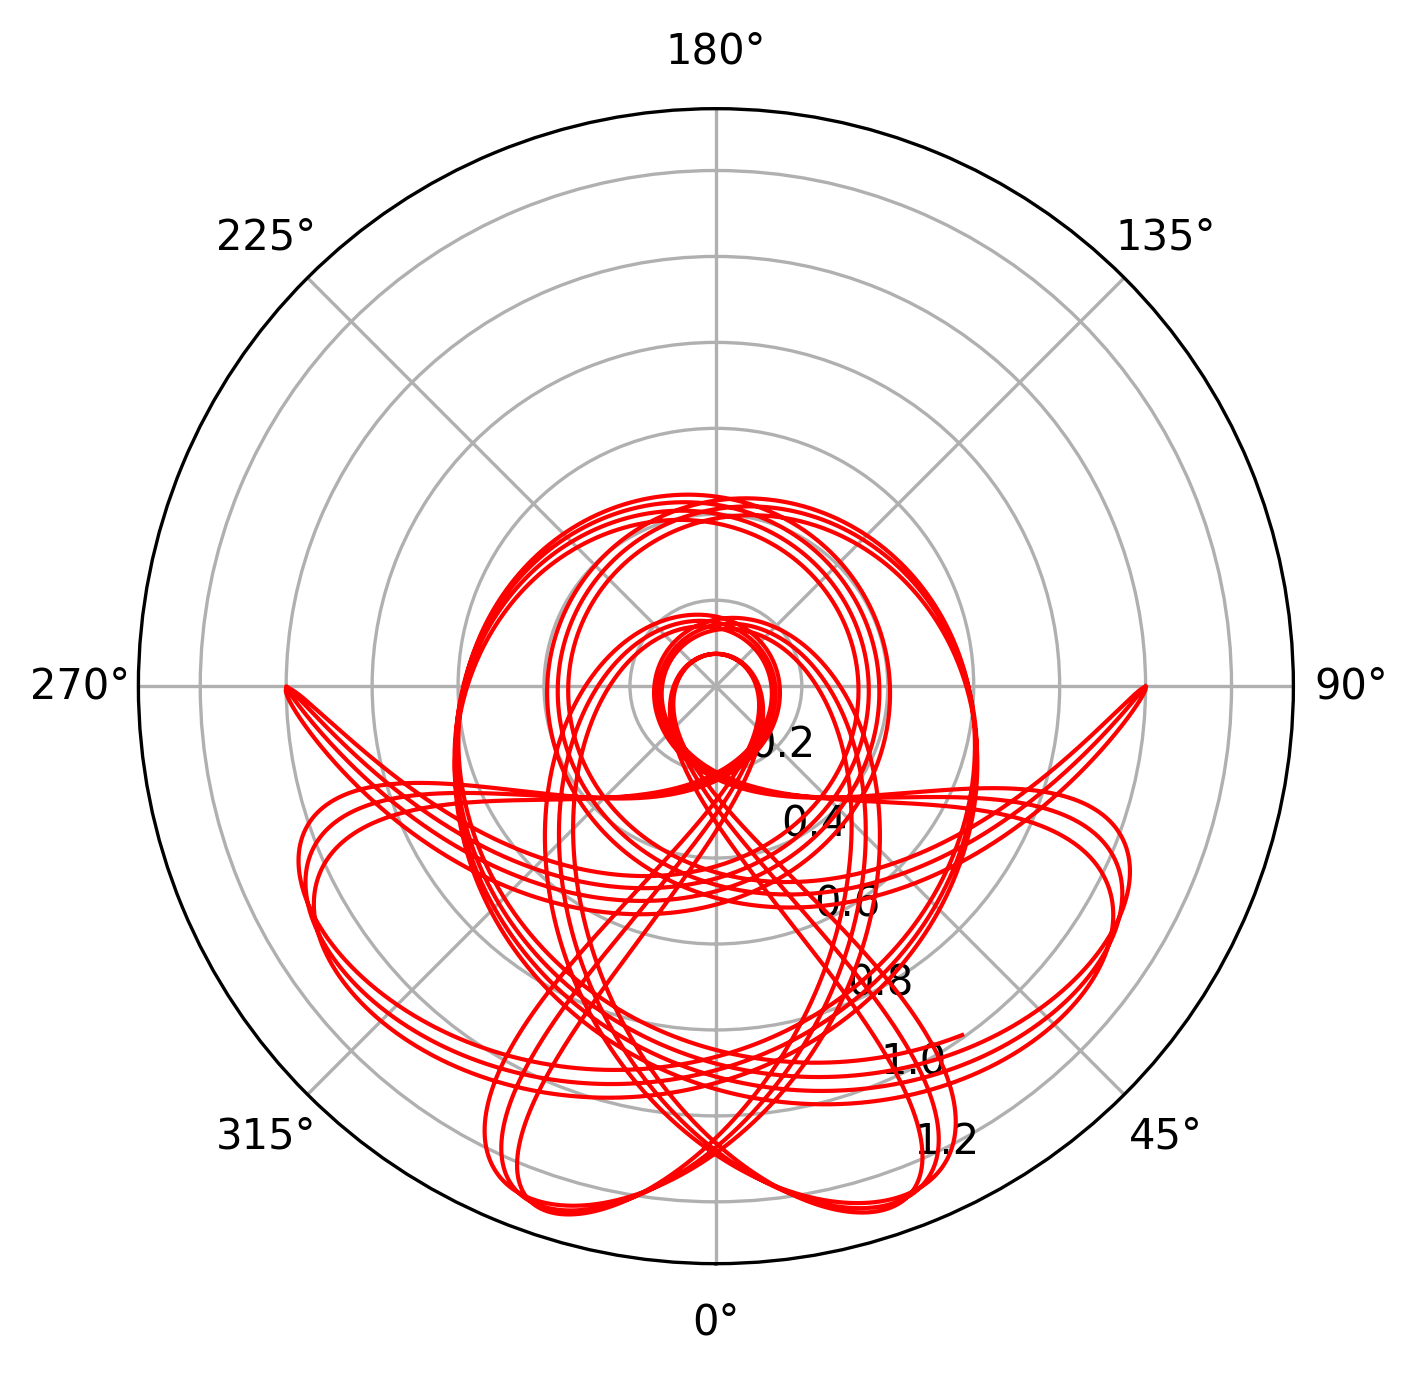

In [20]:
# Begin plotting
plt.figure(dpi=300, figsize=(5, 5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location ("S")
ax.plot(variables[:, 2], variables[:, 0], color='r', linewidth=1)
#plt.title('$SAM$ for $\mu = %.3f$ , $r_0 = %.3f$ , $\\theta_0 = %.3f^\degree$, $t_{max} = %.2f$' % (mu, r0, theta0 * 180 / math.pi, max_time), y=1.06)
ax.grid(True)
if not flag:
    print('Calculation was successful.')
    plt.savefig('filename.png', dpi=300,bbox_inches='tight')
    plt.show()